___
<img style="float: left; margin: 30px 15px 15px 15px;" src="https://d33wubrfki0l68.cloudfront.net/4ec62c1c925a380c912ddad740d18554c6822a11/fabe4/img/sponsors/iteso-university.png" width="300" height="500" /> 


# PRIMER EXAMEN PARCIAL
# MODELO NO LINEAL PARA PRONÓSTICOS

## Examen Tema 1
## Nombre:

## Fecha: 23 de febrero del 2024

## Por: Oscar David Jaramillo Z.

Basado en el dataset ‘Daily Temperature of Major Cities’ `City_temp_P2.csv`, que se encuentra adjuntado a este notebook, realizar un modelo de pronóstico, en donde cada estudiante analizará el siguiente país:

|   **Ciudad**  |              **Estudiante**             |
|:-------------:|:---------------------------------------:|
|   'Munich',   |        AVILA PADILLA, KALEB AZAEL       |
|    'Oslo',    |      BARRIOS MARTINEZ, CHRISTA ITZEL    |
|   'Tirana',   |          CABRERA JARAMILLO, AXEL        |
|  'Barcelona', |   CONTRERAS FIGUEROA, JAVIER ALEJANDRO  |
|  'Amsterdam', |       DUEÑAS GODINEZ, SERGIO DANIEL     |
|   'Warsaw',   |          GALLEGOS VELICA, ARANXA        |
|   'Lisbon',   |       GONZALEZ CUEVAS, ANDRE YAHIR      |
|  'Bucharest', |     HERNANDEZ RAMIREZ, RICARDO DAMIAN   |
|   'Moscow',   |    HERRADA AVALOS, FLAVIO MAXIMILIANO   |
| 'Bratislava', |     HINOJOSA RABAGO, JUDITH ALEJANDRA   |
|   'Bilbao',   |       JUAREZ BADILLO CHAVEZ, RAFAEL     |
|   'Vienna',   |     MURGUIA ORANTES, MANUEL ALEJANDRO   |
|   'Madrid',   |        ORNELAS LEON, HECTOR CESAR       |
|  'Stockholm'  |     RODRIGUEZ NUÑEZ, CARLOS EMILIANO    |

1. **Preparación de datos y visualización de la serie temporal:**
Lleve a cabo una exhaustiva preparación de los datos, incluyendo la limpieza de valores faltantes (NAs) y la identificación de posibles valores atípicos (outliers) que puedan influir en el análisis. Identifique y analice las anomalías presentes en la serie temporal. Utilice técnicas de detección de anomalías como Isolation Forest o métodos específicos para series temporales. Discuta posibles causas de estas anomalías y su impacto en el análisis y pronóstico de la serie temporal. Posteriormente, divida los datos en conjuntos de entrenamiento y prueba en una proporción de 75% y 25%, respectivamente. Antes de proceder a la visualización de la serie temporal, realice las transformaciones y escalado pertinentes, justificando cada paso de su análisis. Elabore un gráfico de la serie temporal donde el eje x represente las fechas. (10 puntos)

2. **Análisis exploratorio y caracterización de la serie temporal:**
Analice la serie temporal de entrenamiento para identificar y describir sus principales características, incluyendo estacionariedad, estacionalidad, tendencia y autocorrelación. Utilice pruebas estadísticas y gráficos pertinentes para fundamentar sus conclusiones. (20 puntos)

3. **Selección y evaluación de modelos SARIMA:**
Basándose en las características identificadas en el análisis previo, proponga al menos cinco modelos SARIMA diferentes que puedan ajustarse adecuadamente a los datos de entrenamiento. Aplique estos modelos y compare sus resultados, justificando la elección del modelo más adecuado. (20 puntos)

4. **Análisis de residuos y selección final del modelo:**
Seleccione el mejor modelo SARIMA obtenido en el paso anterior y realice un análisis exhaustivo de los residuos del modelo. Incluya al menos una prueba de hipótesis para verificar si los residuos se comportan como ruido blanco. Presente sus conclusiones sobre la idoneidad del modelo seleccionado. (15 puntos)

5. **Pronóstico de la serie temporal:**
Utilizando el modelo SARIMA seleccionado, realice un pronóstico para la longitud del conjunto de prueba. Escriba la ecuación del modelo seleccionado y genere el pronóstico, teniendo en cuenta que cada nueva predicción debe incorporar el valor anterior del conjunto de prueba. Por ejemplo, si el conjunto de test tiene 10 muestras, el primer forecast sólo incluye estimaciones del modelo entrenado con datos de train. Para la segunda predicción, se agrega a los datos de entrenamiento el primer valor del conjunto de test, se entrena el modelo con esos nuevos datos y se genera la predicción. Este proce sucesivamente en cada paso de predicción. (20 puntos)

6. **Comparación con Autoarima y análisis de resultados:**
Utilizando el paquete [Autoarima](https://alkaline-ml.com/pmdarima/about.html#about), implemente un análisis exhaustivo para seleccionar el modelo óptimo de SARIMA para pronosticar la serie temporal proporcionada. Asegúrese de comprender y aplicar correctamente las funcionalidades del paquete, incluyendo la búsqueda automática de hiperparámetros, la selección del mejor modelo y la generación de pronósticos. Detalle el proceso seguido para la selección del modelo, incluyendo los criterios utilizados y los resultados obtenidos. Además, compare los pronósticos generados por el modelo AutoARIMA con los obtenidos mediante el enfoque manual utilizando SARIMA, presentando una evaluación crítica de ambos enfoques. En este punto, agregar un grafico que incluya el test, el forecasting con el inciso 5 (pude poner forecasting de varios modelos si así lo desea) y el forecasting con el autoarima. ¿Que puede concluir de esto? (15 puntos)

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Zuluaga.
</footer>

In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import shapiro, probplot 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import probplot
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
data = pd.read_csv("/Users/axeljaramillo/Documents/series_no_lineales/examen_tema1/Examen Tema 1/City_temp_P2.csv")
# filtrar por Tirana city - Axel Jaramillo
df = data[data['City'] == 'Tirana']
# crear variable tiempo
df['Datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

/var/folders/pj/4_pg178n3dd1bpk7fxl0kr940000gn/T/ipykernel_58165/1052491916.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day']])


In [3]:
df['Datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df.isnull().sum()

/var/folders/pj/4_pg178n3dd1bpk7fxl0kr940000gn/T/ipykernel_58165/1522844956.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day']])


Region               0
Country              0
State             9266
City                 0
Month                0
Day                  0
Year                 0
AvgTemperature       0
Datetime             0
dtype: int64

In [4]:
df = df[["AvgTemperature","Datetime"]]

,AvgTemperature,Datetime
count,9266.000000,9266
mean,33.172923,2007-09-07 07:51:48.914310400
min,-99.000000,1995-01-01 00:00:00
25%,43.200000,2001-05-05 06:00:00
50%,56.500000,2007-09-07 12:00:00
75%,69.700000,2014-01-09 18:00:00
max,92.500000,2020-05-13 00:00:00
std,61.926355,NaN


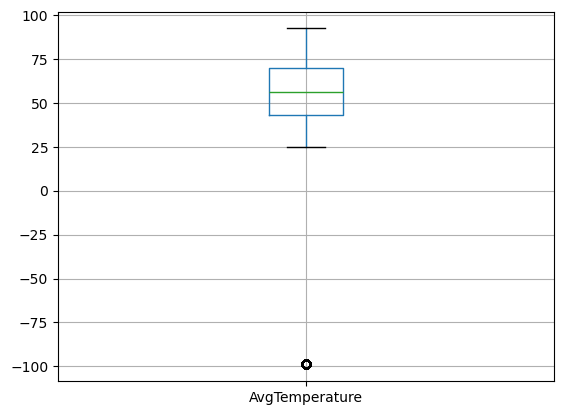

In [5]:
df.boxplot(column=["AvgTemperature"])
df.describe()

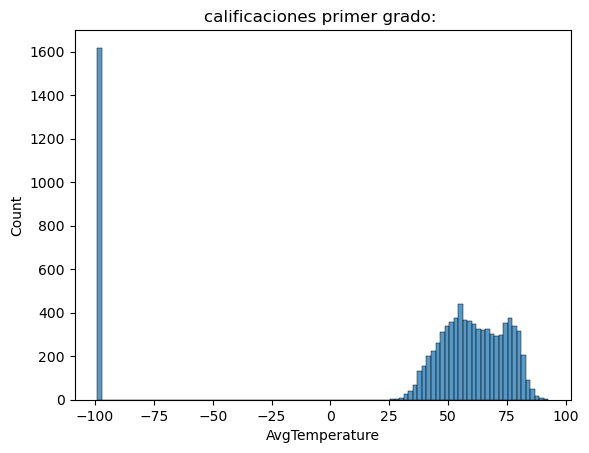

In [6]:
sns.histplot(df["AvgTemperature"],bins=100)
plt.title("calificaciones primer grado: ")
plt.show()

En este caso los valores sin registro son temperaturas -100, dado que según esta fuente proporciona que nunca se ha registrado estas temperaturas en todos las tomaré como nulos.

[Climate change - Albania](https://www.climatechangepost.com/albania/climate-change/#:~:text=The%20climate%20of%20Albania&text=In%20the%20south%20west%2C%20temperatures,43.9%C2%B0C%20(2).)

In [7]:
df = df[df['AvgTemperature'] > -90]

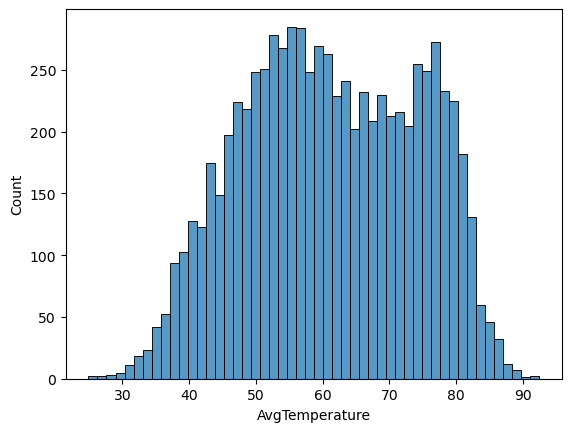

In [8]:
sns.histplot(df["AvgTemperature"],bins=50)
plt.show()

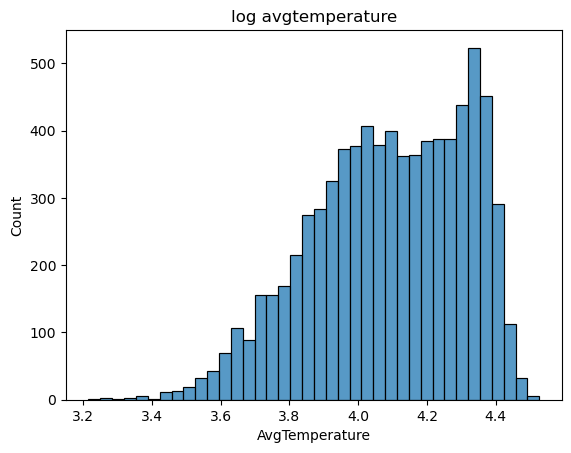

In [9]:
a = np.log(df["AvgTemperature"])
sns.histplot(a)
plt.title("log avgtemperature")
plt.show()

/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Normality test p-value after 'box-cox' transformation: 3.544436965434147e-32


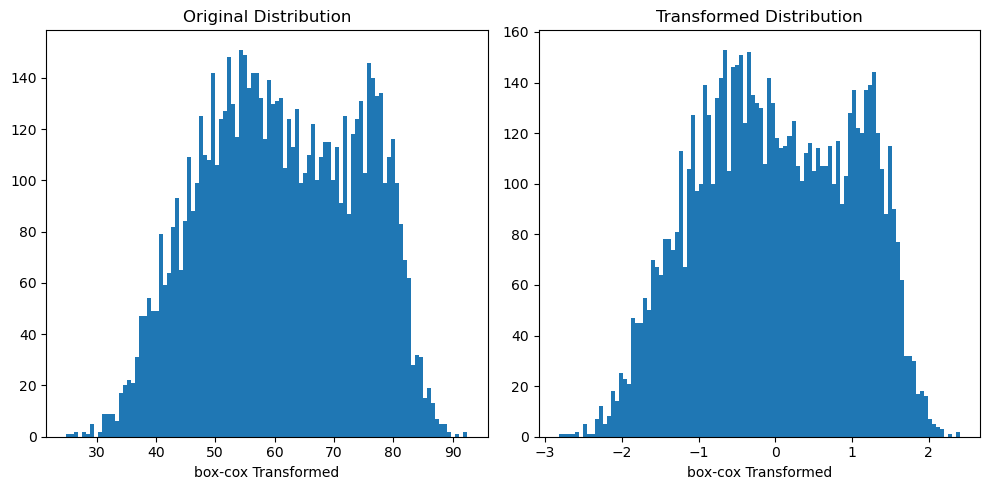

In [10]:
data = df["AvgTemperature"].to_numpy()
method = 'box-cox'  
def find_best_transformation(data, method=method):

    pt = PowerTransformer(method=method, standardize=True) 
    transformed_data = pt.fit_transform(data.reshape(-1, 1))
    stat, p = shapiro(transformed_data)  # Perform normality test
    return transformed_data.squeeze(), p

def plot_transformation_comparison(original_data, transformed_data):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    ax1.hist(original_data, bins=100)
    ax1.set_title("Original Distribution")
    ax1.set_xlabel(f"{method} Transformed")

    ax2.hist(transformed_data, bins=100)
    ax2.set_title("Transformed Distribution")
    ax2.set_xlabel(f"{method} Transformed") 

    plt.tight_layout()
    plt.show()

transformed_data, p_value = find_best_transformation(data)
print(f"Normality test p-value after '{method}' transformation: {p_value}")
plot_transformation_comparison(data, transformed_data)

/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Normality test p-value after 'yeo-johnson' transformation: 3.544436965434147e-32


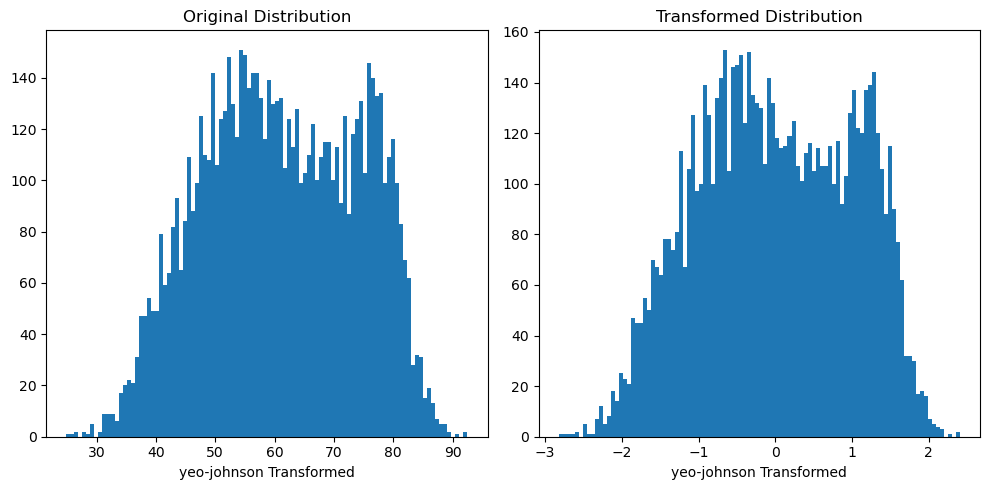

In [11]:
method = 'yeo-johnson'  
transformed_data, p_value = find_best_transformation(data)

print(f"Normality test p-value after '{method}' transformation: {p_value}")

plot_transformation_comparison(data, transformed_data)


Shapiro-Wilk statistic: 0.9689569473266602
Shapiro-Wilk p-value: 1.1322557733032038e-37


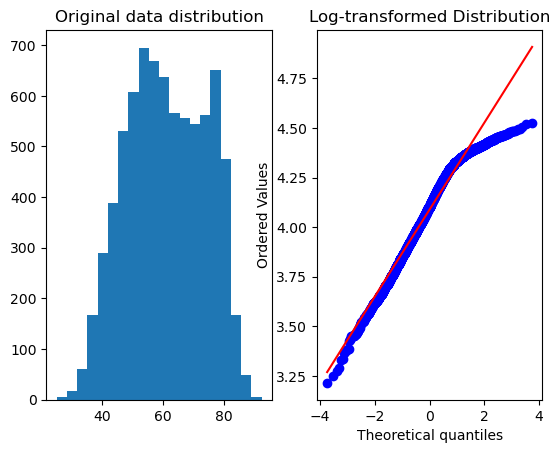

In [12]:
def normality_test_log_transform(data):
    log_data = np.log(data)  
    statistic, p_value = shapiro(log_data) 
    return statistic, p_value, log_data
data = df["AvgTemperature"]
statistic, p_value, log_data = normality_test_log_transform(data)
print(f"Shapiro-Wilk statistic: {statistic}")
print(f"Shapiro-Wilk p-value: {p_value}")

plt.subplot(1, 2, 1)
plt.hist(data, bins=20)
plt.title("Original data distribution")

plt.subplot(1, 2, 2)
probplot(log_data, dist="norm", plot=plt)  # QQ Plot
plt.title("Log-transformed Distribution")
plt.show()

Principalmente la gráfica tiene 2 picos, distribución normal aplicamos box-cox y yeo-johnson estas nos muestran que siguen una distribución no normal dado p-value
- Normal:
    - Normality test p-value after 'box-cox' transformation: 3.544436965434147e-32
    - Normality test p-value after 'yeo-johnson' transformation: 3.544436965434147e-32
    - para tranformación logaritmica Shapiro-Wilk statistic: 0.9689569473266602, Shapiro-Wilk p-value: 1.1322557733032038e-37


Posteriormente se escalaron los datos porque puede afectar para nuestra serie tener outliers significativos.
Por lo tanto voy a pasar a arima model con un nivel de no-normalidad.

In [13]:
from sklearn.preprocessing import MinMaxScaler

def escalar_datos(data):
  scaler = MinMaxScaler(feature_range=(0, 1))
  scaler.fit(data.reshape(-1, 1))
  scaled_data = scaler.transform(data.reshape(-1, 1))
  return scaled_data

scaled_data = escalar_datos(log_data.to_numpy())


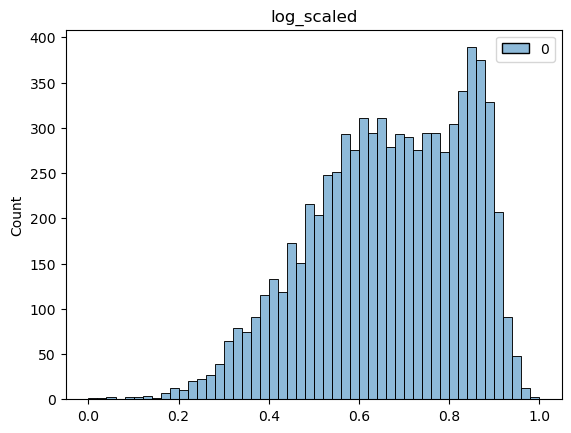

In [14]:
sns.histplot(scaled_data, bins=50)
plt.title("log_scaled")
plt.show()

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
# Graficar ACF y PACF
def plot_acf_pacf(data, kwargs=dict()):
    f = plt.figure(figsize=(8,5))

    ax1 = f.add_subplot(121)

    plot_acf(data, zero=False, ax=ax1, **kwargs)

    ax2 = f.add_subplot(122)
    plot_pacf(data, zero=False, ax=ax2, method='ols', **kwargs)

    plt.show()
    
# Análisis de estacionariedad
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)
    
    if (dftest[1] <= 0.05) & (dftest[4]['5%'] > dftest[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")


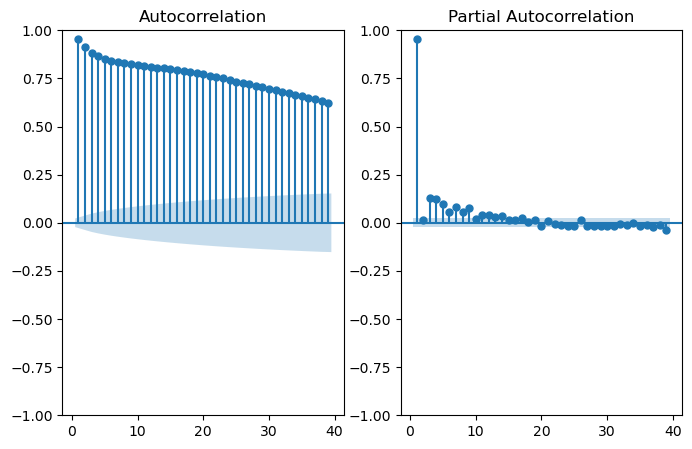

Results of Dickey-Fuller Test:
Test Statistic                   -5.315842
p-value                           0.000005
#Lags Used                       16.000000
Number of Observations Used    7631.000000
Critical Value (1%)              -3.431207
Critical Value (5%)              -2.861919
Critical Value (10%)             -2.566972
dtype: float64
Stationary


In [16]:
plot_acf_pacf(scaled_data)
adf_test(scaled_data)

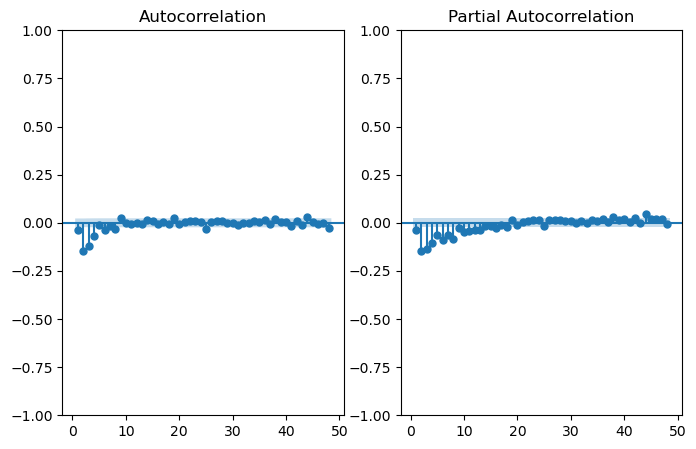

Results of Dickey-Fuller Test:
Test Statistic                  -29.823463
p-value                           0.000000
#Lags Used                       15.000000
Number of Observations Used    7631.000000
Critical Value (1%)              -3.431207
Critical Value (5%)              -2.861919
Critical Value (10%)             -2.566972
dtype: float64
Stationary


In [17]:
x = pd.DataFrame(scaled_data)
plot_acf_pacf(x.diff().dropna(), {'lags': 48})
adf_test(x.diff().dropna())

In [34]:

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import MSTL
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
import warnings


class LinearForecast:
    def __init__(self, data): 
        self.data = data
        
    def plot_acf_pacf(self, kwargs=dict()):
        f = plt.figure(figsize=(8,5))
        ax1 = f.add_subplot(121)
        plot_acf(self.data, zero=False, ax=ax1, **kwargs)
        ax2 = f.add_subplot(122)
        plot_pacf(self.data, zero=False, ax=ax2, method='ols', **kwargs)
        plt.show()
        
    def adf_test(self, data):
        print("Results of Dickey-Fuller Test:")
        dftest = adfuller(data, autolag="AIC")
        dfoutput = pd.Series(
            dftest[0:4],
            index=[
                "Test Statistic",
                "p-value",
                "#Lags Used",
                "Number of Observations Used",
            ],
        )
        for key, value in dftest[4].items():
            dfoutput["Critical Value (%s)" % key] = value
        print(dfoutput)
        
        if (dftest[1] <= 0.05) & (dftest[4]['5%'] > dftest[0]):
            print("\u001b[32mStationary\u001b[0m")
        else:
            print("\x1b[31mNon-stationary\x1b[0m")
    def plot_seasonal_decomposition(self, periods_seasonality=(6, 12), stl_kwargs=None):
        if stl_kwargs is None:
            stl_kwargs = {"seasonal_deg": 0} 
        
        model = MSTL(self.data, periods=periods_seasonality, stl_kwargs=stl_kwargs)
        res = model.fit()

        fig, ax = plt.subplots(5, 1, sharex=True, figsize=(8, 8))

        res.observed.plot(ax=ax[0])
        ax[0].set_ylabel('Observed')

        res.trend.plot(ax=ax[1])
        ax[1].set_ylabel('Trend')

        res.seasonal[f'seasonal_{periods_seasonality[0]}'].plot(ax=ax[2])
        ax[2].set_ylabel(f'seasonal_{periods_seasonality[0]}')

        res.seasonal[f'seasonal_{periods_seasonality[1]}'].plot(ax=ax[3])
        ax[3].set_ylabel(f'seasonal_{periods_seasonality[1]}')

        res.resid.plot(ax=ax[4])
        ax[4].set_ylabel('Residual')

        fig.tight_layout()
        plt.show()
        return res
    def sarimax(self, p, d, q, P, D, Q, chosenSeasonality, t=['n', 'c', 't', 'ct']):

        params_no_estacionales = list(itertools.product(p, d, q))
        params_estacionales = [(x[0], x[1], x[2], chosenSeasonality) for x in list(itertools.product(P, D, Q))]

        sarimax_params = list(itertools.product(params_no_estacionales, params_estacionales, t))
        self.sarimax_params = sarimax_params

    def best_params(self):

        resultados = pd.DataFrame(columns=['params', 'AIC', 'BIC', 'LLF'], index=np.arange(0, 11))

        print(f'{len(self.sarimax_params)} combinations')

        i = 0
        for par_no_season, par_season, trend in self.sarimax_params:

            mod = SARIMAX(
                endog=self.data,
                trend=trend,
                order=par_no_season,
                seasonal_order=par_season
            )
            results = mod.fit()

            print(f'Params: {par_no_season}, {par_season}, {trend}')

            resultados.loc[i, 'params'] = str((par_no_season, par_season, trend))
            resultados.loc[i, 'AIC'] = results.aic
            resultados.loc[i, 'BIC'] = results.bic
            resultados.loc[i, 'LLF'] = results.llf
            i += 1

        self.resultadosParams = resultados
        return self.resultadosParams
    def sarimax_model(self, order, seasonal_order):
        model = SARIMAX(self.data, order=order, seasonal_order=seasonal_order)
        return model

In [19]:
df["scaled"] = scaled_data
df = df.drop("AvgTemperature",axis=1)


In [20]:
data = df[['Datetime', 'scaled']]
data.columns = ['date', 'y']
data = pd.DataFrame(data)
data = data.set_index('date').resample('M').mean()
data

,y
date,
1997-04-30,0.648148
1997-05-31,0.755840
1997-06-30,0.856848
1997-07-31,0.896690
1997-08-31,NaN
...,...
2020-01-31,0.401558
2020-02-29,0.503080
2020-03-31,0.569329


In [21]:
lf = LinearForecast(data)

In [22]:
lf.adf_test(data.dropna())
lf.adf_test(data.dropna())

Results of Dickey-Fuller Test:
Test Statistic                  -3.425172
p-value                          0.010130
#Lags Used                      11.000000
Number of Observations Used    256.000000
Critical Value (1%)             -3.456155
Critical Value (5%)             -2.872897
Critical Value (10%)            -2.572822
dtype: float64
Stationary
Results of Dickey-Fuller Test:
Test Statistic                  -3.425172
p-value                          0.010130
#Lags Used                      11.000000
Number of Observations Used    256.000000
Critical Value (1%)             -3.456155
Critical Value (5%)             -2.872897
Critical Value (10%)            -2.572822
dtype: float64
Stationary


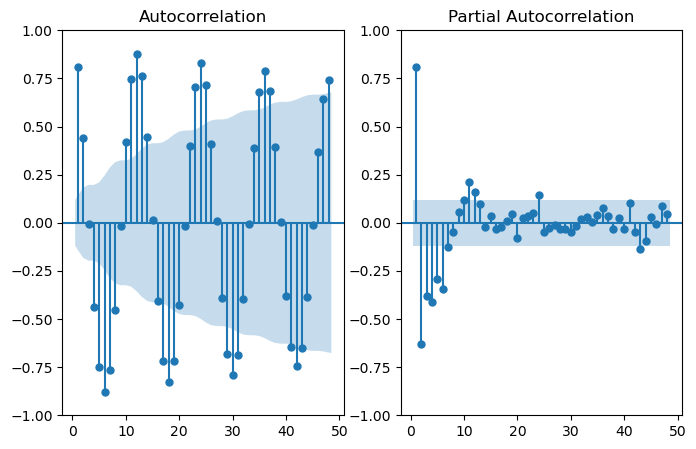

In [23]:
LinearForecast(data.dropna()).plot_acf_pacf({'lags': 48})

In [36]:
res = LinearForecast(data)
des = res.plot_seasonal_decomposition(data)


ax = des.observed.to_frame('Timelapse').plot()
des.seasonal.plot(ax=ax)

ValueError: Periods and windows must have same length

In [24]:
p = [2, 1, 1]
d = [1]
q = [0, 1]
P = [0, 1]
D = [0]
Q = [0, 1]
ls = LinearForecast(data)
ls.sarimax(p, d, q, P, D, Q, 6)
posibleParams = ls.best_params().sort_values(by=['AIC'], ascending=True)
posibleParams

96 combinations
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.11405D+00    |proj g|=  5.88002D-02

At iterate    5    f= -1.11410D+00    |proj g|=  1.24542D-02

At iterate   10    f= -1.11410D+00    |proj g|=  3.13389D-03

At iterate   15    f= -1.11410D+00    |proj g|=  7.53108D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     20      1     0     0   7.531D-05  -1.114D+00
  F =  -1.1141029882621478     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH      

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2     53      2     0     0   2.294D+01  -1.114D+00
  F =  -1.1140580329565419     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Params: (2, 1, 0), (0, 0, 0, 6), t
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.11381D+00    |proj g|=  2.35280D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy sear

/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.


Params: (2, 1, 0), (0, 0, 0, 6), ct
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.14730D+00    |proj g|=  8.35428D-01

At iterate    5    f= -1.17861D+00    |proj g|=  8.75554D-01

At iterate   10    f= -1.18065D+00    |proj g|=  5.06889D-01

At iterate   15    f= -1.18745D+00    |proj g|=  3.16467D-01

At iterate   20    f= -1.18880D+00    |proj g|=  2.04851D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     31      1     0     0   7.482D-05  -1.189D+00
  F 

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     47      2     0     0   2.640D+01  -1.147D+00
  F =  -1.1473015507144906     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Params: (2, 1, 0), (0, 0, 1, 6), t
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.14704D+00    |proj g|=  3.04821D+01


/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     47      2     0     0   2.650D+01  -1.147D+00
  F =  -1.1470382823204113     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Params: (2, 1, 0), (0, 0, 1, 6), ct
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.15250D+00    |proj g|=  1.28570D+00

At iterate    5    f= -1.17095D+00    |proj g|=  2.16454D+00

At iterate   10    f= -1.26088D+00    |proj g|=  1.20733D+00

At iterate   15    f= -1.33417D+0

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     21      1     0     0   2.275D+01  -1.153D+00
  F =  -1.1525057816193403     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Params: (2, 1, 0), (1, 0, 0, 6), t
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.15251D+00    |proj g|=  2.99974D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy sear

 This problem is unconstrained.



At iterate    5    f= -1.37689D+00    |proj g|=  5.86080D+00

At iterate   10    f= -1.50777D+00    |proj g|=  1.82051D+00

At iterate   15    f= -1.51887D+00    |proj g|=  4.92850D-01

At iterate   20    f= -1.52163D+00    |proj g|=  3.51742D-01

At iterate   25    f= -1.55472D+00    |proj g|=  2.03999D+00

At iterate   30    f= -1.63250D+00    |proj g|=  5.93530D-01

At iterate   35    f= -1.63787D+00    |proj g|=  2.06494D-01

At iterate   40    f= -1.64933D+00    |proj g|=  1.36045D-01

At iterate   45    f= -1.65569D+00    |proj g|=  8.89869D-02

At iterate   50    f= -1.65580D+00    |proj g|=  3.28822D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   15    f= -1.43088D+00    |proj g|=  3.91839D+00

At iterate   20    f= -1.51822D+00    |proj g|=  1.39818D-01

At iterate   25    f= -1.51961D+00    |proj g|=  3.17433D-01

At iterate   30    f= -1.54783D+00    |proj g|=  1.58605D-01

At iterate   35    f= -1.63030D+00    |proj g|=  8.74375D-01

At iterate   40    f= -1.63843D+00    |proj g|=  4.98189D-01

At iterate   45    f= -1.65357D+00    |proj g|=  7.00696D-03

At iterate   50    f= -1.65549D+00    |proj g|=  1.35807D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     62      1     0     0   1.358D-01  -1.655D+00
  F =  -1.65548916116

/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   20    f= -1.27617D+00    |proj g|=  8.83031D+00

At iterate   25    f= -1.32750D+00    |proj g|=  3.39409D+02

At iterate   30    f= -1.37701D+00    |proj g|=  3.55356D-01

At iterate   35    f= -1.37725D+00    |proj g|=  1.18603D+01

At iterate   40    f= -1.42614D+00    |proj g|=  2.11211D+02

At iterate   45    f= -1.51833D+00    |proj g|=  5.76266D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     74      1     0     0   1.439D+00  -1.518D+00
  F =  -1.5183607514458224     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Params: (2, 1, 0), (1, 0, 1, 6), t
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.25149D+00    |proj g|=  9.96624D+00

At iterate    5    f= -1.25152D+00    |proj g|=  1.14235D+01

At iterate   10    f= -1.26057D+00    |proj g|=  1.48105D+02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   15    f= -1.27584D+00    |proj g|=  8.09052D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     15     54      2     0     0   8.091D-01  -1.276D+00
  F =  -1.2758370093739833     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Params: (2, 1, 0), (1, 0, 1, 6), ct
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.57374D-01    |proj g|=  8.81460D+00

At iterate    5    f= -1.07259D+00    |proj g|=  5.04124D+00

At iterate   10    f= -1.11519D+0

/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parame


At iterate   20    f= -1.11658D+00    |proj g|=  6.28324D-03

At iterate   25    f= -1.11728D+00    |proj g|=  1.23922D-01

At iterate   30    f= -1.11740D+00    |proj g|=  8.05655D-03

At iterate   35    f= -1.11740D+00    |proj g|=  1.09235D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     48      1     0     0   1.092D-05  -1.117D+00
  F =  -1.1174040074283176     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Params: (2, 1, 1), (0, 0, 0, 6), c
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   15    f= -9.02973D-01    |proj g|=  3.53947D+02

At iterate   20    f= -9.32022D-01    |proj g|=  1.46434D+00

At iterate   25    f= -9.32130D-01    |proj g|=  7.10433D+00

At iterate   30    f= -9.50491D-01    |proj g|=  1.22297D+02

At iterate   35    f= -1.06927D+00    |proj g|=  1.94679D+01

At iterate   40    f= -1.07238D+00    |proj g|=  2.02492D+01

At iterate   45    f= -1.10956D+00    |proj g|=  2.80465D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49    100      2     0     0   1.761D+00  -1.115D+00
  F =  -1.1146426317972444     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Params: (2, 1, 1), (0, 0, 0, 6), ct
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.58675D-01    |proj g|=  5.96036D+00

At iterate    5    f= -1.15129D+00    |proj g|=  8.67254D-01

At iterate   10    f= -1.19026D+00    |proj g|=  7.69040D-02

At iterate   15    f= -1.19038D+0

/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   25    f= -1.19043D+00    |proj g|=  3.86887D-03

At iterate   30    f= -1.19046D+00    |proj g|=  2.87594D-02

At iterate   35    f= -1.19084D+00    |proj g|=  7.61506D-02

At iterate   40    f= -1.19096D+00    |proj g|=  4.80428D-02

At iterate   45    f= -1.19107D+00    |proj g|=  4.95264D-03

At iterate   50    f= -1.19107D+00    |proj g|=  1.28892D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     60      1     0     0   1.289D-03  -1.191D+00
  F =  -1.1910723174250146     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Params: (2, 1, 1), (0, 0, 1, 6), c
RUNNING THE L-BF

/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate    5    f= -9.58676D-01    |proj g|=  2.46923D+01

At iterate   10    f= -9.58677D-01    |proj g|=  1.63356D+01

At iterate   15    f= -9.58678D-01    |proj g|=  5.95534D+00

At iterate   20    f= -9.58722D-01    |proj g|=  6.10736D+01

At iterate   25    f= -9.73715D-01    |proj g|=  3.21272D+02

At iterate   30    f= -9.98136D-01    |proj g|=  7.62090D-01

At iterate   35    f= -1.17719D+00    |proj g|=  7.79188D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertibl


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39    205      2     0     0   5.222D+00  -1.189D+00
  F =  -1.1894185242991433     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Params: (2, 1, 1), (0, 0, 1, 6), t
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.58561D-01    |proj g|=  3.06311D+01

At iterate    5    f= -9.58561D-01    |proj g|=  2.47372D+01

At iterate   10    f= -9.58562D-01    |proj g|=  1.63256D+01

At iterate   15    f= -9.58563D-01

/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate    5    f= -1.33556D+00    |proj g|=  5.35962D-01

At iterate   10    f= -1.34966D+00    |proj g|=  1.62866D-01

At iterate   15    f= -1.35588D+00    |proj g|=  7.80750D-01

At iterate   20    f= -1.37800D+00    |proj g|=  1.97674D+00

At iterate   25    f= -1.46684D+00    |proj g|=  1.54429D+00

At iterate   30    f= -1.47593D+00    |proj g|=  1.46846D-01

At iterate   35    f= -1.47618D+00    |proj g|=  2.38985D-01

At iterate   40    f= -1.48134D+00    |proj g|=  2.01258D+00

At iterate   45    f= -1.49459D+00    |proj g|=  1.38664D-01

At iterate   50    f= -1.49479D+00    |proj g|=  4.49829D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


Params: (2, 1, 1), (1, 0, 0, 6), n
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.30587D+00    |proj g|=  4.14290D+00

At iterate    5    f= -1.33557D+00    |proj g|=  5.36102D-01

At iterate   10    f= -1.34948D+00    |proj g|=  2.27035D-01

At iterate   15    f= -1.35506D+00    |proj g|=  6.23174D-01

At iterate   20    f= -1.36239D+00    |proj g|=  6.29518D-01

At iterate   25    f= -1.45527D+00    |proj g|=  9.11946D-01

At iterate   30    f= -1.47737D+00    |proj g|=  2.61437D+00

At iterate   35    f= -1.47846D+00    |proj g|=  3.30341D-02

At iterate   40    f= -1.47850D+00    |proj g|=  3.14567D-01

At iterate   45    f= -1.48158D+00    |proj g|=  4.97929D+00

At iterate   50    f= -1.48981D+00    |proj g|=  7.16007D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total num

/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.30586D+00    |proj g|=  2.71157D+01


/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     47      2     0     0   2.274D+01  -1.306D+00
  F =  -1.3058637538022992     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Params: (2, 1, 1), (1, 0, 0, 6), t
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.30591D+00    |proj g|=  2.75014D+01


/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible 


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      2     45      2     0     0   2.236D+01  -1.306D+00
  F =  -1.3059137851491418     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Params: (2, 1, 1), (1, 0, 0, 6), ct
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.27155D+00    |proj g|=  2.88338D+00

At iterate    5    f= -1.30777D+00    |proj g|=  3.23519D+00

At iterate   10    f= -1.40182D+00    |proj g|=  1.90318D-01

At iterate   15    f= -1.44723D+0

/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.27155D+00    |proj g|=  2.88312D+00

At iterate    5    f= -1.30808D+00    |proj g|=  3.25498D+00

At iterate   10    f= -1.40182D+00    |proj g|=  1.90458D-01

At iterate   15    f= -1.44786D+00    |proj g|=  2.16036D+00

At iterate   20    f= -1.48406D+00    |proj g|=  2.04866D-01

At iterate   25    f= -1.52454D+00    |proj g|=  6.61363D-02

At iterate   30    f= -1.62803D+00    |proj g|=  6.05021D+00

At iterate   35    f= -1.71276D+00    |proj g|=  1.02994D+01

At iterate   40    f= -1.73655D+00    |proj g|=  6.81416D-01

At iterate   45    f= -1.74393D+00    |proj g|=  8.05176D+00


/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   50    f= -1.75880D+00    |proj g|=  7.11930D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     63      1     0     0   7.119D+00  -1.759D+00
  F =  -1.7587982608643378     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Params: (2, 1, 1), (1, 0, 1, 6), c
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.27154D+00    |proj g|=  1.10840D+01

At iterate    5    f= -1.27155D+00    |proj g|=  2.88140D+00

At iterate   10    f= -1.27169D+00

/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.



At iterate   50    f= -1.47291D+00    |proj g|=  2.45633D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     61      1     0     0   2.456D+01  -1.473D+00
  F =  -1.4729137113509889     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Params: (2, 1, 1), (1, 0, 1, 6), t
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.27153D+00    |proj g|=  1.13287D+01

At iterate    5    f= -1.27154D+00    |proj g|=  2.87924D+00

At iterate   10    f= -1.27167D+00


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.11406D+00    |proj g|=  2.25694D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     21      1     0     0   2.257D+01  -1.114D+00
  F =  -1.1140637607552750     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Params: (1, 1, 0), (0, 0, 0, 6), t
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the

/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.


Params: (1, 1, 0), (0, 0, 1, 6), n
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.14682D+00    |proj g|=  7.93939D-01

At iterate    5    f= -1.17131D+00    |proj g|=  1.75115D+00

At iterate   10    f= -1.17801D+00    |proj g|=  1.42105D-01

At iterate   15    f= -1.18430D+00    |proj g|=  1.35545D+00

At iterate   20    f= -1.18776D+00    |proj g|=  1.04814D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     49      1     0     0   2.529D-04  -1.188D+00
  F =


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


Params: (1, 1, 0), (0, 0, 1, 6), c
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.14684D+00    |proj g|=  2.94382D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2     52      2     0     0   2.825D+01  -1.147D+00
  F =  -1.1468393770458807     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


Params: (1, 1, 0), (0, 0, 1, 6), t
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.14670D+00    |proj g|=  2.93419D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     30      1     0     0   2.828D+01  -1.147D+00
  F =  -1.1466956403040303     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Params: (1, 1, 0), (0, 0, 1, 6), ct
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f= -1.32756D+00    |proj g|=  7.18172D-01

At iterate   20    f= -1.34564D+00    |proj g|=  3.41946D-01

At iterate   25    f= -1.34579D+00    |proj g|=  3.07526D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     32      1     0     0   7.325D-05  -1.346D+00
  F =  -1.3457930727770413     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Params: (1, 1, 0), (1, 0, 0, 6), n
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.14811D+00


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     44      1     0     0   5.151D-05  -1.346D+00
  F =  -1.3458038789139761     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Params: (1, 1, 0), (1, 0, 0, 6), c
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.14810D+00    |proj g|=  2.87791D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy sear


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     55      2     0     0   2.286D+01  -1.148D+00
  F =  -1.1480676655945634     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Params: (1, 1, 0), (1, 0, 0, 6), ct
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.24921D+00    |proj g|=  3.57391D+00

At iterate    5    f= -1.27426D+00    |proj g|=  7.23763D-01

At iterate   10    f= -1.39306D+00    |proj g|=  7.06157D+00

At iterate   15    f= -1.50561D+0

/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   20    f= -1.51129D+00    |proj g|=  5.22673D-02

At iterate   25    f= -1.51528D+00    |proj g|=  1.34136D+00

At iterate   30    f= -1.59363D+00    |proj g|=  3.56260D-01

At iterate   35    f= -1.61002D+00    |proj g|=  5.13177D-02

At iterate   40    f= -1.61745D+00    |proj g|=  8.45926D-01

At iterate   45    f= -1.62598D+00    |proj g|=  1.36605D-01

At iterate   50    f= -1.62643D+00    |proj g|=  3.25627D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     64      1     0     0   3.256D-02  -1.626D+00
  F =  -1.6264264167353306     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate    5    f= -1.24924D+00    |proj g|=  1.15145D+01

At iterate   10    f= -1.25809D+00    |proj g|=  1.45170D+02

At iterate   15    f= -1.27221D+00    |proj g|=  6.54431D-01

At iterate   20    f= -1.27250D+00    |proj g|=  1.09801D+01

At iterate   25    f= -1.28677D+00    |proj g|=  1.91951D+02

At iterate   30    f= -1.50255D+00    |proj g|=  3.74545D+01

At iterate   35    f= -1.50473D+00    |proj g|=  7.25643D+00



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     65      1     0     0   7.256D+00  -1.505D+00
  F =  -1.5047255224177649     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Params: (1, 1, 0), (1, 0, 1, 6), t
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.24917D+00    |proj g|=  9.58289D+00

At iterate    5    f= -1.24920D+00    |proj g|=  1.12339D+01

At iterate   10    f= -1.25785D+00    |proj g|=  1.44155D+02

At iterate   15    f= -1.27216D+00

/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   50    f= -1.50565D+00    |proj g|=  1.69308D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     75      1     0     0   1.693D+00  -1.506D+00
  F =  -1.5056499121044657     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Params: (1, 1, 0), (1, 0, 1, 6), ct
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.11406D+00    |proj g|=  4.03235D-02

At iterate    5    f= -1.11407D+00    |proj g|=  3.61027D-02

At iterate   10    f= -1.11408D+0

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     28      1     0     0   2.238D+01  -1.114D+00
  F =  -1.1138555985775707     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Params: (1, 1, 1), (0, 0, 0, 6), ct
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.14678D+00    |proj g|=  9.17115D-01

At iterate    5    f= -1.18410D+00    |proj g|=  1.40443D-01

At iterate   10    f= -1.18731D+00    |proj g|=  1.26539D-02

At iterate   15    f= -1.18784D+0


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -1.18451D+00    |proj g|=  3.19935D-01

At iterate   15    f= -1.18726D+00    |proj g|=  1.29663D-02

At iterate   20    f= -1.18749D+00    |proj g|=  2.84335D-01

At iterate   25    f= -1.18830D+00    |proj g|=  6.39323D-02

At iterate   30    f= -1.18832D+00    |proj g|=  1.25674D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     40      1     0     0   1.257D-03  -1.188D+00
  F =  -1.1883205576131504     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Params: (1, 1, 1), (0, 0, 1, 6), c
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N 

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     45      2     0     0   2.611D+01  -1.147D+00
  F =  -1.1467844245818017     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Params: (1, 1, 1), (0, 0, 1, 6), t
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.14656D+00    |proj g|=  3.22789D+01


/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     45      2     0     0   2.636D+01  -1.147D+00
  F =  -1.1465638101670466     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Params: (1, 1, 1), (0, 0, 1, 6), ct
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.14988D+00    |proj g|=  1.30978D+00

At iterate    5    f= -1.20135D+00    |proj g|=  3.50796D+00

At iterate   10    f= -1.35577D+00    |proj g|=  5.35215D-01

At iterate   15    f= -1.47201D+0

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     53      2     0     0   2.322D+01  -1.150D+00
  F =  -1.1498871109568083     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Params: (1, 1, 1), (1, 0, 0, 6), t
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.14993D+00    |proj g|=  3.13763D+01


/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3     51      2     0     0   2.215D+01  -1.150D+00
  F =  -1.1499404360656074     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Params: (1, 1, 1), (1, 0, 0, 6), ct
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.24913D+00    |proj g|=  3.68203D+00

At iterate    5    f= -1.28561D+00    |proj g|=  2.30193D+00

At iterate   10    f= -1.45847D+00    |proj g|=  3.77689D-01

At iterate   15    f= -1.57763D+0


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


Params: (1, 1, 1), (1, 0, 1, 6), n
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.24913D+00    |proj g|=  3.68189D+00

At iterate    5    f= -1.31840D+00    |proj g|=  2.53322D+00

At iterate   10    f= -1.45785D+00    |proj g|=  4.08016D+00

At iterate   15    f= -1.47972D+00    |proj g|=  1.96660D+00

At iterate   20    f= -1.57378D+00    |proj g|=  3.26915D+00

At iterate   25    f= -1.57666D+00    |proj g|=  9.35053D-01

At iterate   30    f= -1.62237D+00    |proj g|=  3.75716D+00

At iterate   35    f= -1.68196D+00    |proj g|=  2.64788D+00

At iterate   40    f= -1.71351D+00    |proj g|=  7.52460D+00

At iterate   45    f= -1.73881D+00    |proj g|=  1.70707D+01


/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   50    f= -1.76785D+00    |proj g|=  4.31603D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     63      1     0     0   4.316D+00  -1.768D+00
  F =  -1.7678462809783546     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Params: (1, 1, 1), (1, 0, 1, 6), c
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.24913D+00    |proj g|=  1.00757D+01

At iterate    5    f= -1.24916D+00    |proj g|=  1.11800D+01

At iterate   10    f= -1.25801D+00


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     86      1     0     0   1.339D+02  -1.464D+00
  F =  -1.4639407264467095     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Params: (1, 1, 1), (1, 0, 1, 6), t
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.24915D+00    |proj g|=  1.04173D+01

At iterate    5    f= -1.24917D+00    |proj g|=  1.06327D+01

At iterate   10    f= -1.25764D+00    |proj g|=  1.47420D+02

At iterate   15    f= -1.27413D+00

/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   50    f= -1.47247D+00    |proj g|=  3.16086D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     65      1     0     0   3.161D+02  -1.472D+00
  F =  -1.4724705837878906     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Params: (1, 1, 1), (1, 0, 1, 6), ct
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.11406D+00    |proj g|=  8.83714D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluatio

/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      1     21      1     0     0   2.260D+01  -1.114D+00
  F =  -1.1139346482888999     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Params: (1, 1, 0), (0, 0, 0, 6), ct
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.14684D+00    |proj g|=  7.94425D-01

At iterate    5    f= -1.17386D+00    |proj g|=  1.58111D+00

At iterate   10    f= -1.17843D+00    |proj g|=  3.62171D-01

At iterate   15    f= -1.18503D+0


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     49      1     0     0   2.529D-04  -1.188D+00
  F =  -1.1877595554943512     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Params: (1, 1, 0), (0, 0, 1, 6), c
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.14684D+00    |proj g|=  2.94382D+01


/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2     52      2     0     0   2.825D+01  -1.147D+00
  F =  -1.1468393770458807     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Params: (1, 1, 0), (0, 0, 1, 6), t
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.14670D+00    |proj g|=  2.93419D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy sear

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     44      1     0     0   5.151D-05  -1.346D+00
  F =  -1.3458038789139761     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Params: (1, 1, 0), (1, 0, 0, 6), c
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.14810D+00    |proj g|=  2.87791D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy sear


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     55      2     0     0   2.286D+01  -1.148D+00
  F =  -1.1480676655945634     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Params: (1, 1, 0), (1, 0, 0, 6), ct
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.24921D+00    |proj g|=  3.57391D+00

At iterate    5    f= -1.27426D+00    |proj g|=  7.23763D-01

At iterate   10    f= -1.39306D+00    |proj g|=  7.06157D+00

At iterate   15    f= -1.50561D+0

/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   20    f= -1.51129D+00    |proj g|=  5.22673D-02

At iterate   25    f= -1.51528D+00    |proj g|=  1.34136D+00

At iterate   30    f= -1.59363D+00    |proj g|=  3.56260D-01

At iterate   35    f= -1.61002D+00    |proj g|=  5.13177D-02

At iterate   40    f= -1.61745D+00    |proj g|=  8.45926D-01

At iterate   45    f= -1.62598D+00    |proj g|=  1.36605D-01

At iterate   50    f= -1.62643D+00    |proj g|=  3.25627D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     64      1     0     0   3.256D-02  -1.626D+00
  F =  -1.6264264167353306     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate    5    f= -1.24924D+00    |proj g|=  1.15145D+01

At iterate   10    f= -1.25809D+00    |proj g|=  1.45170D+02

At iterate   15    f= -1.27221D+00    |proj g|=  6.54431D-01

At iterate   20    f= -1.27250D+00    |proj g|=  1.09801D+01

At iterate   25    f= -1.28677D+00    |proj g|=  1.91951D+02

At iterate   30    f= -1.50255D+00    |proj g|=  3.74545D+01

At iterate   35    f= -1.50473D+00    |proj g|=  7.25643D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     65      1     0     0   7.256D+00  -1.505D+00
  F =  -1.5047255224177649     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f= -1.27249D+00    |proj g|=  2.83278D+01

At iterate   25    f= -1.28091D+00    |proj g|=  8.52094D+01

At iterate   30    f= -1.28215D+00    |proj g|=  3.33345D+00

At iterate   35    f= -1.28237D+00    |proj g|=  1.65873D+01

At iterate   40    f= -1.29730D+00    |proj g|=  1.96029D+02

At iterate   45    f= -1.47045D+00    |proj g|=  1.02167D+01


/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   50    f= -1.50565D+00    |proj g|=  1.69308D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     75      1     0     0   1.693D+00  -1.506D+00
  F =  -1.5056499121044657     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
Params: (1, 1, 0), (1, 0, 1, 6), ct
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.11406D+00    |proj g|=  4.03235D-02

At iterate    5    f= -1.11407D+00    |proj g|=  3.61027D-02

At iterate   10    f= -1.11408D+0

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     28      1     0     0   2.238D+01  -1.114D+00
  F =  -1.1138555985775707     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Params: (1, 1, 1), (0, 0, 0, 6), ct
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.14678D+00    |proj g|=  9.17115D-01

At iterate    5    f= -1.18410D+00    |proj g|=  1.40443D-01

At iterate   10    f= -1.18731D+00    |proj g|=  1.26539D-02

At iterate   15    f= -1.18784D+0


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f= -1.18451D+00    |proj g|=  3.19935D-01

At iterate   15    f= -1.18726D+00    |proj g|=  1.29663D-02

At iterate   20    f= -1.18749D+00    |proj g|=  2.84335D-01

At iterate   25    f= -1.18830D+00    |proj g|=  6.39323D-02

At iterate   30    f= -1.18832D+00    |proj g|=  1.25674D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     40      1     0     0   1.257D-03  -1.188D+00
  F =  -1.1883205576131504     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Params: (1, 1, 1), (0, 0, 1, 6), c
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N 

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     45      2     0     0   2.611D+01  -1.147D+00
  F =  -1.1467844245818017     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Params: (1, 1, 1), (0, 0, 1, 6), t
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.14656D+00    |proj g|=  3.22789D+01


/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     45      2     0     0   2.636D+01  -1.147D+00
  F =  -1.1465638101670466     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Params: (1, 1, 1), (0, 0, 1, 6), ct
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.14988D+00    |proj g|=  1.30978D+00

At iterate    5    f= -1.20135D+00    |proj g|=  3.50796D+00

At iterate   10    f= -1.35577D+00    |proj g|=  5.35215D-01

At iterate   15    f= -1.47201D+0

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3     53      2     0     0   2.322D+01  -1.150D+00
  F =  -1.1498871109568083     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Params: (1, 1, 1), (1, 0, 0, 6), t
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.14993D+00    |proj g|=  3.13763D+01


/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3     51      2     0     0   2.215D+01  -1.150D+00
  F =  -1.1499404360656074     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Params: (1, 1, 1), (1, 0, 0, 6), ct
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.24913D+00    |proj g|=  3.68203D+00

At iterate    5    f= -1.28561D+00    |proj g|=  2.30193D+00

At iterate   10    f= -1.45847D+00    |proj g|=  3.77689D-01

At iterate   15    f= -1.57763D+0


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.24913D+00    |proj g|=  3.68189D+00

At iterate    5    f= -1.31840D+00    |proj g|=  2.53322D+00

At iterate   10    f= -1.45785D+00    |proj g|=  4.08016D+00

At iterate   15    f= -1.47972D+00    |proj g|=  1.96660D+00

At iterate   20    f= -1.57378D+00    |proj g|=  3.26915D+00

At iterate   25    f= -1.57666D+00    |proj g|=  9.35053D-01

At iterate   30    f= -1.62237D+00    |proj g|=  3.75716D+00

At iterate   35    f= -1.68196D+00    |proj g|=  2.64788D+00

At iterate   40    f= -1.71351D+00    |proj g|=  7.52460D+00

At iterate   45    f= -1.73881D+00    |proj g|=  1.70707D+01

At iterate   50    f= -1.76785D+00    |proj g|=  4.31603D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate    5    f= -1.24916D+00    |proj g|=  1.11800D+01

At iterate   10    f= -1.25801D+00    |proj g|=  1.49661D+02

At iterate   15    f= -1.27415D+00    |proj g|=  2.91491D-01

At iterate   20    f= -1.27441D+00    |proj g|=  2.24960D+01

At iterate   25    f= -1.29240D+00    |proj g|=  2.74823D+02

At iterate   30    f= -1.41705D+00    |proj g|=  1.56088D+02

At iterate   35    f= -1.46393D+00    |proj g|=  1.76589D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     86      1     0     0   1.339D+02  -1.464D+00
  F =  -1.4639407264467095     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


Params: (1, 1, 1), (1, 0, 1, 6), t
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.24915D+00    |proj g|=  1.04173D+01

At iterate    5    f= -1.24917D+00    |proj g|=  1.06327D+01

At iterate   10    f= -1.25764D+00    |proj g|=  1.47420D+02

At iterate   15    f= -1.27413D+00    |proj g|=  2.91149D-01

At iterate   20    f= -1.27430D+00    |proj g|=  1.64796D+01

At iterate   25    f= -1.28376D+00    |proj g|=  1.72152D+02

At iterate   30    f= -1.30123D+00    |proj g|=  8.77018D-01

At iterate   35    f= -1.30221D+00    |proj g|=  1.54111D+01

At iterate   40    f= -1.35373D+00    |proj g|=  2.75217D+02

At iterate   45    f= -1.46649D+00    |proj g|=  2.72008D+02

At iterate   50    f= -1.47247D+00    |proj g|=  3.16086D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total num

/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,params,AIC,BIC,LLF
92,"((1, 1, 1), (1, 0, 1, 6), 'n')",-971.678096,-953.558008,490.839048
60,"((1, 1, 1), (1, 0, 1, 6), 'n')",-971.678096,-953.558008,490.839048
93,"((1, 1, 1), (1, 0, 1, 6), 'c')",-970.922532,-949.178427,491.461266
61,"((1, 1, 1), (1, 0, 1, 6), 'c')",-970.922532,-949.178427,491.461266
28,"((2, 1, 1), (1, 0, 1, 6), 'n')",-969.521058,-947.776953,490.760529
...,...,...,...,...
18,"((2, 1, 1), (0, 0, 0, 6), 't')",-609.783926,-591.663838,309.891963
83,"((1, 1, 1), (0, 0, 0, 6), 'ct')",-609.303713,-591.183625,309.651856
51,"((1, 1, 1), (0, 0, 0, 6), 'ct')",-609.303713,-591.183625,309.651856
3,"((2, 1, 0), (0, 0, 0, 6), 'ct')",-609.27964,-591.159553,309.63982


In [25]:
so = (1, 0, 1, 6)
o = (1, 1, 1)
forcast = LinearForecast(data)
model = forcast.sarimax_model(o, so)
results = model.fit()
print(results.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.24913D+00    |proj g|=  3.68203D+00

At iterate    5    f= -1.28561D+00    |proj g|=  2.30193D+00

At iterate   10    f= -1.45847D+00    |proj g|=  3.77689D-01

At iterate   15    f= -1.57763D+00    |proj g|=  1.17828D+00

At iterate   20    f= -1.61851D+00    |proj g|=  2.08677D+00

At iterate   25    f= -1.71382D+00    |proj g|=  3.46080D-01

At iterate   30    f= -1.74896D+00    |proj g|=  2.17464D-01

At iterate   35    f= -1.76358D+00    |proj g|=  5.41432D-02

At iterate   40    f= -1.76548D+00    |proj g|=  3.13081D-01

At iterate   45    f= -1.76561D+00    |proj g|=  4.16402D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


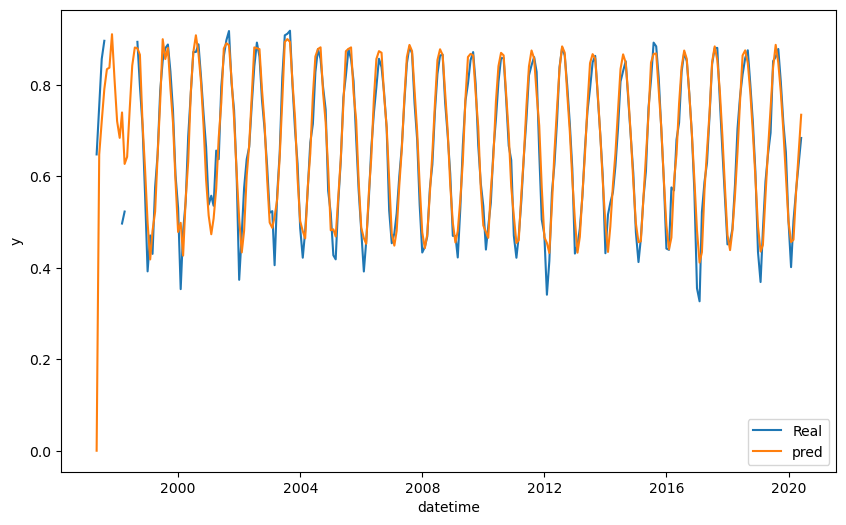

In [26]:
predictions = results.predict()
plt.figure(figsize=(10, 6))
plt.plot(data, label='Real')
plt.plot(predictions, label='pred', linestyle='-')
plt.xlabel('datetime')
plt.ylabel('y')
plt.legend()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-616.929, Time=0.82 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-186.539, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-441.083, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=449.725, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=-587.427, Time=0.63 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=-527.526, Time=0.66 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=inf, Time=2.17 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=-616.507, Time=2.14 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=-595.798, Time=0.29 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=-577.159, Time=1.93 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=-563.384, Time=2.31 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=-617.745, Time=2.45 sec
 ARIMA(1,0,2)(2,0,2)[12] intercept   : AIC=-619.484, Time=2.72 sec
 ARIMA(1,0,2)(1,0,2)[12] inter

/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no 


At iterate   15    f= -1.35952D+00    |proj g|=  1.66511D-01

At iterate   20    f= -1.38198D+00    |proj g|=  1.95276D+00

At iterate   25    f= -1.38611D+00    |proj g|=  5.90997D-02

At iterate   30    f= -1.39205D+00    |proj g|=  4.48050D-01

At iterate   35    f= -1.39301D+00    |proj g|=  3.84960D-01

At iterate   40    f= -1.39506D+00    |proj g|=  5.10752D-01

At iterate   45    f= -1.39533D+00    |proj g|=  9.10609D-02


/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(



At iterate   50    f= -1.39542D+00    |proj g|=  2.40359D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     69      1     0     0   2.404D-01  -1.395D+00
  F =  -1.3954151334443747     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
MSE AutoARIMA: 0.0014833164059438438
MSE SARIMA manual: 0.0016529281622021971


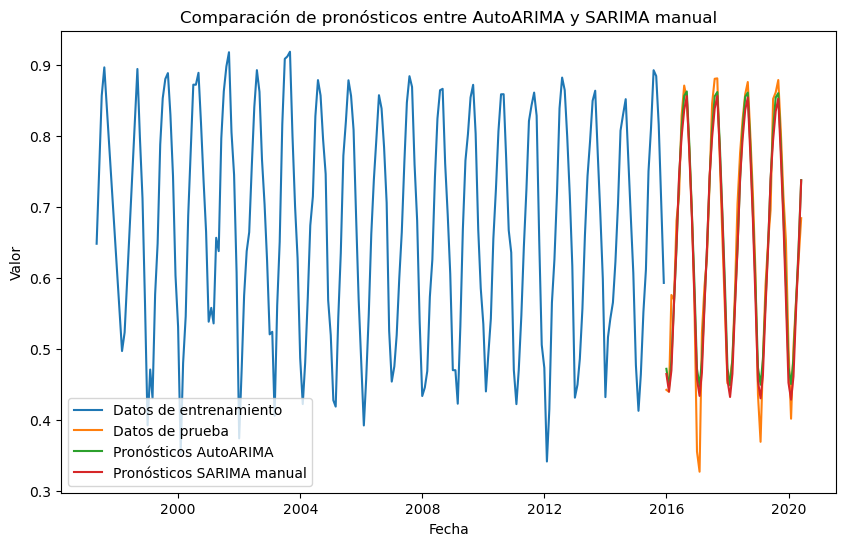

In [27]:
order = (1, 1, 1)
seasonal_order = (1, 0, 1, 6)

train, test = train_test_split(data.dropna(), test_size=0.2, shuffle=False)

model_autoarima = auto_arima(train, seasonal=True, m=12, trace=True)

forecast_autoarima = model_autoarima.predict(n_periods=len(test))

# hiperparámetros óptimos 
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

model_sarima = SARIMAX(train, order=order, seasonal_order=seasonal_order)
results = model_sarima.fit()
# Obtener los pronósticos con SARIMA manualmente ajustado
forecast_sarima = results.get_forecast(steps=len(test)).predicted_mean

# Calcular el error cuadrático medio
mse_autoarima = mean_squared_error(test, forecast_autoarima)
mse_sarima = mean_squared_error(test, forecast_sarima)

print(f'MSE AutoARIMA: {mse_autoarima}')
print(f'MSE SARIMA manual: {mse_sarima}')

# Gráfico de comparación de pronósticos
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Datos de entrenamiento')
plt.plot(test.index, test, label='Datos de prueba')
plt.plot(test.index, forecast_autoarima, label='Pronósticos AutoARIMA')
plt.plot(test.index, forecast_sarima, label='Pronósticos SARIMA manual')
plt.legend()
plt.title('Comparación de pronósticos entre AutoARIMA y SARIMA manual')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.show()

/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/series_no_lineales/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Mean Squared Error: 0.0014833164059438438


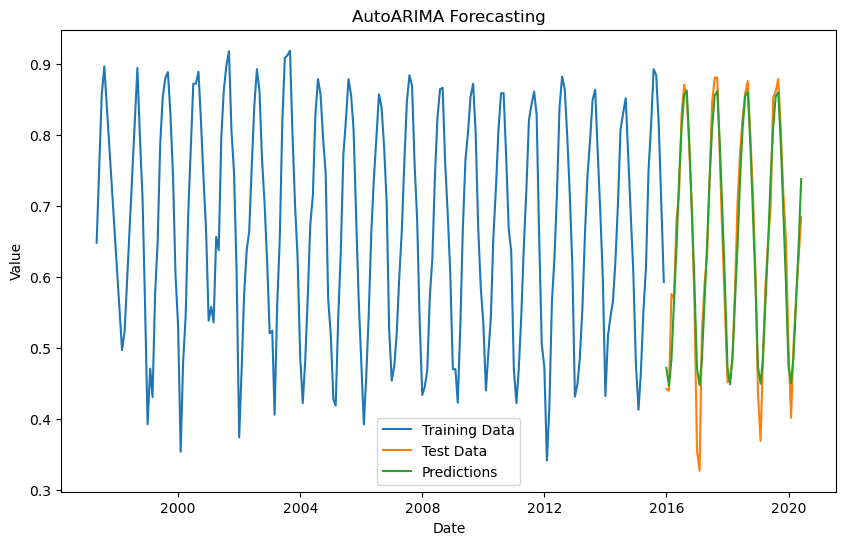

In [29]:
model = auto_arima(train, seasonal=True, m=12)

forecast = model.predict(n_periods=len(test))

mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error: {mse}')


plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, forecast, label='Predictions')
plt.title('AutoARIMA Forecasting')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

Como conclusión se puede observar que los hiperparametros elegidos si son los optimos, sin embargo tiene overfit, porque la predicción es casi perfecta.
Se comprende que autoarima y pdarima son librerías que facilitan estas funciones que generamos porque evitas iteración manual y estas librerías facilitan estos procesos si las usas adecuadamente.
aprendí el manejo de iteraciones, me costó trabajo manejar algunos errores con mis datos para meterlos en la graficas de autocorrelation y pcf, tuve dificultades para manejar estas librerías al igual que debo reforzar conocimientos para futuras aplicaciones.
Concluyó que estas herramientas facilitan para encontrar los hiperpárametros adecuados, para predicciones en el tiempo. Para los datos que obtuve se tiene que los filtré por el promedio entre meses porque por año se perdía información, siento que el tratamiento de los datos se debió hacer un poco de mayor profundidad para lograr la normalidad y obtener mejores resultados, sin embargo tratandolos como no normales también aydú la transformación logaritmica, para las tablas de acf y pcf, se lograron en su mayoría. Para la descomoposición tuve errores en el fit del modelo en la función, use la misma que la tarea posterior sin embargo no se logro hacer el fit y la descomposición adecuadamente.